# use best featers function and find the best model:


In [1]:
#choose nu of line to detect
num_of_lines=500

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Demo_metabolic=pd.read_excel("C:/Users/97254/Downloads/ver12_proj1.xlsx", engine='openpyxl')
Demo_metabolic = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines, :])

In [3]:
Demo_metabolic.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,oncologic (cancer),cardiovascular,...,PN_pro_day4,pro_day4,EN_pro_day5,PN_pro_day5,pro_day5,pro/kg_day1,pro/kg_day2,pro/kg_day3,pro/kg_day4,pro/kg_day5
0,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,40.726105,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
1,4,3,LOS_3-4,0,0,0,0,0,1,0,...,0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2,7,6,LOS_5-7,0,0,0,0,0,0,0,...,0.0,72.960000,58.064001,0.0,58.064001,NaN,NaN,NaN,NaN,NaN
3,10,5,LOS_5-7,0,0,0,0,0,0,1,...,0.0,47.578655,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
4,13,3,LOS_3-4,0,0,0,0,1,0,1,...,0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
Demo_metabolic.shape

(500, 63)

In [15]:
x1 = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines,7:57])
x1.head()

,trauma,oncologic (cancer),cardiovascular,pulmonary,kidney,metabolic,gastrointestinal,neurologic,hematologic,vascular,...,PN_pro_day2,pro_day2,EN_pro_day3,PN_pro_day3,pro_day3,EN_pro_day4,PN_pro_day4,pro_day4,EN_pro_day5,PN_pro_day5
0,0,1,0,1,1,1,0,1,1,1,...,0.0,67.770277,118.956574,0.0,118.956574,40.726105,0.0,40.726105,0.000000,0.0
1,0,1,0,1,0,0,1,0,0,0,...,0.0,1.525333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0,0,0,1,0,1,1,1,0,0,...,0.0,72.960001,72.960000,0.0,72.960000,72.960000,0.0,72.960000,58.064001,0.0
3,0,0,1,1,0,1,0,1,0,0,...,0.0,99.439986,89.290646,0.0,89.290646,47.578655,0.0,47.578655,0.000000,0.0
4,1,0,1,0,1,1,0,1,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [16]:
x2 = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines,2 :3])
x2.head()

,LOS_Group
0,LOS_5-7
1,LOS_3-4
2,LOS_5-7
3,LOS_5-7
4,LOS_3-4


In [76]:
#lest = our x
lest=pd.concat([x1,x2],axis=1)
lest.head()

,trauma,oncologic (cancer),cardiovascular,pulmonary,kidney,metabolic,gastrointestinal,neurologic,hematologic,vascular,...,pro_day2,EN_pro_day3,PN_pro_day3,pro_day3,EN_pro_day4,PN_pro_day4,pro_day4,EN_pro_day5,PN_pro_day5,LOS_Group
0,0,1,0,1,1,1,0,1,1,1,...,67.770277,118.956574,0.0,118.956574,40.726105,0.0,40.726105,0.000000,0.0,LOS_5-7
1,0,1,0,1,0,0,1,0,0,0,...,1.525333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,LOS_3-4
2,0,0,0,1,0,1,1,1,0,0,...,72.960001,72.960000,0.0,72.960000,72.960000,0.0,72.960000,58.064001,0.0,LOS_5-7
3,0,0,1,1,0,1,0,1,0,0,...,99.439986,89.290646,0.0,89.290646,47.578655,0.0,47.578655,0.000000,0.0,LOS_5-7
4,1,0,1,0,1,1,0,1,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,LOS_3-4


In [18]:
#target = our y
target=pd.DataFrame(Demo_metabolic.iloc[:num_of_lines,3:4])
target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


LabelEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in lest.columns:
    lest[col] = labelencoder.fit_transform(lest[col].astype(str))
lest.head()

,trauma,oncologic (cancer),cardiovascular,pulmonary,kidney,metabolic,gastrointestinal,neurologic,hematologic,vascular,...,pro_day2,EN_pro_day3,PN_pro_day3,pro_day3,EN_pro_day4,PN_pro_day4,pro_day4,EN_pro_day5,PN_pro_day5,LOS_Group
0,0,1,0,1,1,1,0,1,1,1,...,241,12,0,14,60,0,64,0,0,1
1,0,1,0,1,0,0,1,0,0,0,...,7,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,1,0,0,...,263,169,0,188,115,0,127,52,0,1
3,0,0,1,1,0,1,0,1,0,0,...,317,191,0,217,74,0,80,0,0,1
4,1,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


train_test_split:

In [20]:
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(lest, target, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,trauma,oncologic (cancer),cardiovascular,pulmonary,kidney,metabolic,gastrointestinal,neurologic,hematologic,vascular,...,pro_day2,EN_pro_day3,PN_pro_day3,pro_day3,EN_pro_day4,PN_pro_day4,pro_day4,EN_pro_day5,PN_pro_day5,LOS_Group
324,0,1,1,0,0,0,0,1,1,0,...,223,129,0,135,0,0,0,0,0,0
481,0,0,1,1,1,1,1,0,1,1,...,223,137,0,144,0,0,0,0,0,0
284,0,1,1,1,0,0,0,0,1,0,...,125,0,0,0,0,0,0,0,0,0
497,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,0,1,0,0,...,317,191,0,217,74,0,80,0,0,1


In [21]:
index = []
scores = {"Accuracy": [], "Balanced accuracy": []}

# Use class_weight:

Most of the models in scikit-learn have a parameter class_weight. This parameter will affect the computation of the loss in linear model or the criterion in the tree-based model to penalize differently a false classification from the minority and majority class. We can set class_weight="balanced" such that the weight applied is inversely proportional to the class frequency. We test this parametrization in both linear model and tree-based model.

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))

In [25]:
lr_clf.set_params(logisticregression__class_weight="balanced")
scoring = ["accuracy", "balanced_accuracy"]
index += ["Logistic regression with balanced class weights"]
cv_result = cross_validate(lr_clf, x_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

,Accuracy,Balanced accuracy
Logistic regression with balanced class weights,0.662857,0.57812
Logistic regression with balanced class weights,0.662857,0.57812


In [27]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

num_pipe = SimpleImputer(strategy="mean", add_indicator=True)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
)

preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(random_state=42, n_jobs=2)
)

In [28]:
rf_clf.set_params(randomforestclassifier__class_weight="balanced")

index += ["Random forest with balanced class weights"]
cv_result = cross_validate(rf_clf, x_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\users\97254\appdata\local\programs\python\python38\lib\site-pack

,Accuracy,Balanced accuracy
Logistic regression with balanced class weights,0.662857,0.578120
Logistic regression with balanced class weights,0.662857,0.578120
Random forest with balanced class weights,0.840000,0.498305


Resample the training set during learning:

In [29]:
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

lr_clf = make_pipeline_with_sampler(
    preprocessor_linear,
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000),
)

In [32]:
index += ["Under-sampling + Logistic regression"]
cv_result = cross_validate(lr_clf, x_train, y_train, scoring=scoring)

c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\97254\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-

In [34]:
cv_result["test_accuracy"].mean()

0.5685714285714286

In [36]:
cv_result["test_balanced_accuracy"].mean()



0.573959938366718

# feature importance:

In [40]:
lest.head(2)

,trauma,oncologic (cancer),cardiovascular,pulmonary,kidney,metabolic,gastrointestinal,neurologic,hematologic,vascular,...,pro_day2,EN_pro_day3,PN_pro_day3,pro_day3,EN_pro_day4,PN_pro_day4,pro_day4,EN_pro_day5,PN_pro_day5,LOS_Group
0,0,1,0,1,1,1,0,1,1,1,...,241,12,0,14,60,0,64,0,0,1
1,0,1,0,1,0,0,1,0,0,0,...,7,0,0,0,0,0,0,0,0,0


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01170
Feature: 3, Score: 0.01590
Feature: 4, Score: 0.02431
Feature: 5, Score: 0.00936
Feature: 6, Score: 0.01826
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01062
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00888
Feature: 11, Score: 0.05339
Feature: 12, Score: 0.01362
Feature: 13, Score: 0.06092
Feature: 14, Score: 0.02870
Feature: 15, Score: 0.06131
Feature: 16, Score: 0.02238
Feature: 17, Score: 0.03855
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01785
Feature: 20, Score: 0.06203
Feature: 21, Score: 0.01844
Feature: 22, Score: 0.06009
Feature: 23, Score: 0.02967
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.02638
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.02049
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.02967
Fe

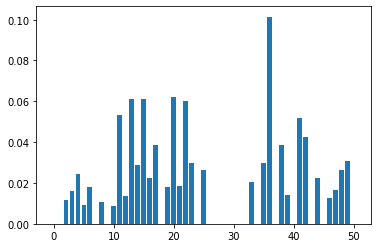

In [37]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(lest, target)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

most: "kidney"."BMI","APACHEII","background problems","pro_to_target_day1","EN_pro_day1","pro_day1","EN_pro_day3","PN_pro_day5"

In [50]:
lest.iloc[:num_of_lines,49:50]

,PN_pro_day5
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [79]:
after_importance = lest[['kidney','BMI','APACHEII','background problems','pro_to_target_day1','EN_pro_day1','pro_day1','EN_pro_day3','PN_pro_day5']]
print(after_importance.shape)
#'kidney','BMI','APACHEII','background problems','pro_to_target_day1','EN_pro_day1','pro_day1','EN_pro_day3','PN_pro_day5'

(500, 9)


In [85]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in after_importance.columns:
    after_importance[col] = labelencoder.fit_transform(after_importance[col].astype(str))
after_importance.head()

<ipython-input-85-27d03bef7f58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_importance[col] = labelencoder.fit_transform(after_importance[col].astype(str))


,kidney,BMI,APACHEII,background problems,pro_to_target_day1,EN_pro_day1,pro_day1,EN_pro_day3,PN_pro_day5
0,1,184,14,2,0,0,0,12,0
1,0,172,0,2,44,34,37,0,0
2,0,21,0,1,371,260,293,169,0
3,0,197,17,1,74,100,110,191,0
4,1,85,7,0,57,33,35,0,0


In [86]:
#train_test_split: again:
x_train, x_test, y_train, y_test = train_test_split(after_importance, target, test_size=.3)

# DecisionTreeClassifier: final:

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
 #x_train, x_test, y_train, y_test
# Predict on training set
pred_y_4 = clf_4.predict(x_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( recall_score(y_test, pred_y_4) )


[0 1]
0.1


<ipython-input-89-47d3b8ade81f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_4.fit(x_train, y_train)


In [30]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.7843137254901961
Criterion=entropy 0.7254901960784313


# prunning:

In [31]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

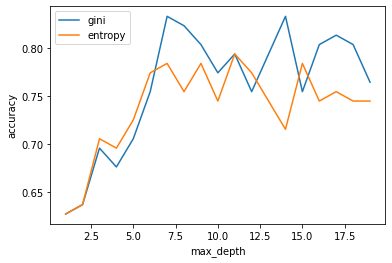

In [32]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

the best is depth of 7

In [33]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=7)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)


0.803921568627451

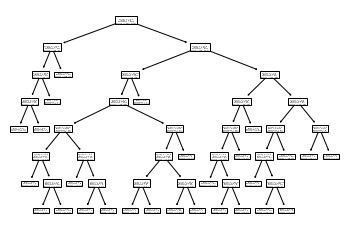

In [34]:
from sklearn import tree
tree.plot_tree(dtree);

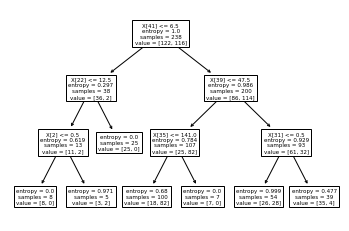

In [35]:
#lets get closer...canot read
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

# RandomForestClassifier final:

In [36]:
clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
 #x_train, x_test, y_train, y_test
# Predict on training set
pred_y_4 = clf_4.predict(x_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )

[0 1]
0.9117647058823529


<ipython-input-36-32e819a8da24>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_4.fit(x_train, y_train)
